# Exploitation & Analyse du dataset
But: Utilisation des données open sources OpenCellID (amelioration du reseau mobile national, de la 2G vers la 4G)
https://aws.amazon.com/marketplace/pp/prodview-ljzfb55am2rla#overview

## Organisation des données

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("dataset.csv")
df = df[df['net'] == 0]

df.head()

,radio,mcc,net,area,cell,unit,lon,lat,range,samples,changeable,created,updated,averageSignal
4,GSM,604,0,5010,12101,0,-4.480362,34.576035,1000,1,1,1459668441,1459668441,0
3963,GSM,604,0,12080,4202,0,-7.638931,33.581772,1000,6,1,1382539124,1382539124,0
3967,GSM,604,0,6000,51290,0,-2.148514,34.999008,1000,8,1,1382764214,1382764214,0
3973,UMTS,604,0,30000,65736011,0,-7.638826,33.581666,1000,13,1,1382540466,1382540466,0
3974,UMTS,604,0,30000,65736018,0,-7.638474,33.581543,1000,6,1,1382539546,1382539546,0


### Signification de chaque colonne

**`radio`**: Network type. One of the strings GSM, UMTS, LTE or CDMA.
<br>
**`mcc`**: Mobile Country Code (UK: 234, 235)
<br>
**`net`**: Mobile Network Code (MNC)
<br>
`A Mobile Country Code (MCC) is used in combination with a Mobile Network Code (MNC) to uniquely identify a mobile network operator (MNO).`
<br>
**`area`**: Location Area Code (LAC) for GSM and UMTS networks. Tracking Area Code (TAC) for LTE networks. Network IDenfitication number (NID) for CDMA networks
<br>
**`cell`**: Cell ID
<br>
**`unit`**: Primary Scrambling Code (PSC) for UMTS networks. Physical Cell ID (PCI) for LTE networks. An empty value for GSM and CDMA networks
<br>
**`lon`**: Longitude in degrees between -180.0 and 180.0
    <ul>
         <li>If changeable=1: average of longitude values of all related measurements.</li>
         <li>If changeable=0: exact GPS position of the cell tower</li>
    </ul>
<br>
**`lat`**: Latitude in degrees between -90.0 and 90.0
    <ul>
        <li>If changeable=1: average of latitude values of all related measurements.</li>
        <li>If changeable=0: exact GPS position of the tower</li>
    </ul>
<br>
**`range`**: Estimate of cell range, in meters.
<br>
**`samples`**: Total number of measurements assigned to the cell tower
<br>
**`changeable`**: Defines if coordinates of the cell tower are exact or approximate.
<br>
**`created`**: The first time when the cell tower was seen and added to the database.
<br>
**`updated`**: The last time when the cell tower was seen and update.
<br>
**`averageSignal`**: Average signal strength from all assigned measurements for the cell.


### Analyse partie radio

**GSM**: seconde génération (2G).<br>
**UMTS**: troisième génération (3G).<br>
**LTE**: quatrième génération (4G).<br>

In [3]:
# Type de station radio
df['radio'].unique()

array(['GSM', 'UMTS', 'LTE'], dtype=object)

In [4]:
# Nombre de mesure effectué
df.shape[0]

23250

In [5]:
# Nombre de station radio
len(df['cell'].unique())

19216

In [6]:
# On garde que les derniers mesures
df_cell = df.drop_duplicates(subset=["cell"], keep="last")
df_cell.shape[0]

19216

In [7]:
# Distribution selon type de station radio
df_cell['radio'].describe()

count     19216
unique        3
top        UMTS
freq      11912
Name: radio, dtype: object

In [8]:
df_cell['radio'].value_counts()

UMTS    11912
GSM      4464
LTE      2840
Name: radio, dtype: int64

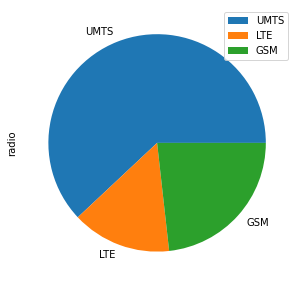

In [9]:
pie_df = pd.DataFrame({'radio': df_cell['radio'].value_counts()},
                  index = df_cell['radio'].unique())

plot = pie_df.plot.pie(y='radio', figsize=(5, 5))

In [10]:
# Pourcentage exacte
s = df_cell['radio'].count()
d = {}
for k, v in df_cell['radio'].value_counts().items():
    perct = v * 100.0 / s
    d[k] = perct
d

{'UMTS': 61.99000832639467,
 'GSM': 23.230641132389675,
 'LTE': 14.779350541215655}

### Visualisation des installations radio sur la carte

In [11]:
import matplotlib.pyplot as plt

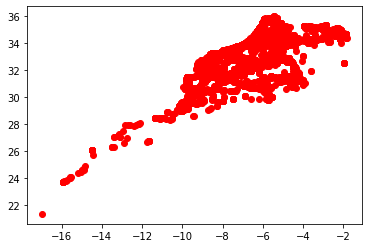

In [12]:
# Plotting Latitude and Longitude Data using scatter function
# from matplotlib (Outline of the map)
plt.scatter(x=df_cell['lon'], y= df_cell['lat'], c= 'red')
plt.rcParams["figure.figsize"] = (50, 35) # Creating figure size
plt.show()

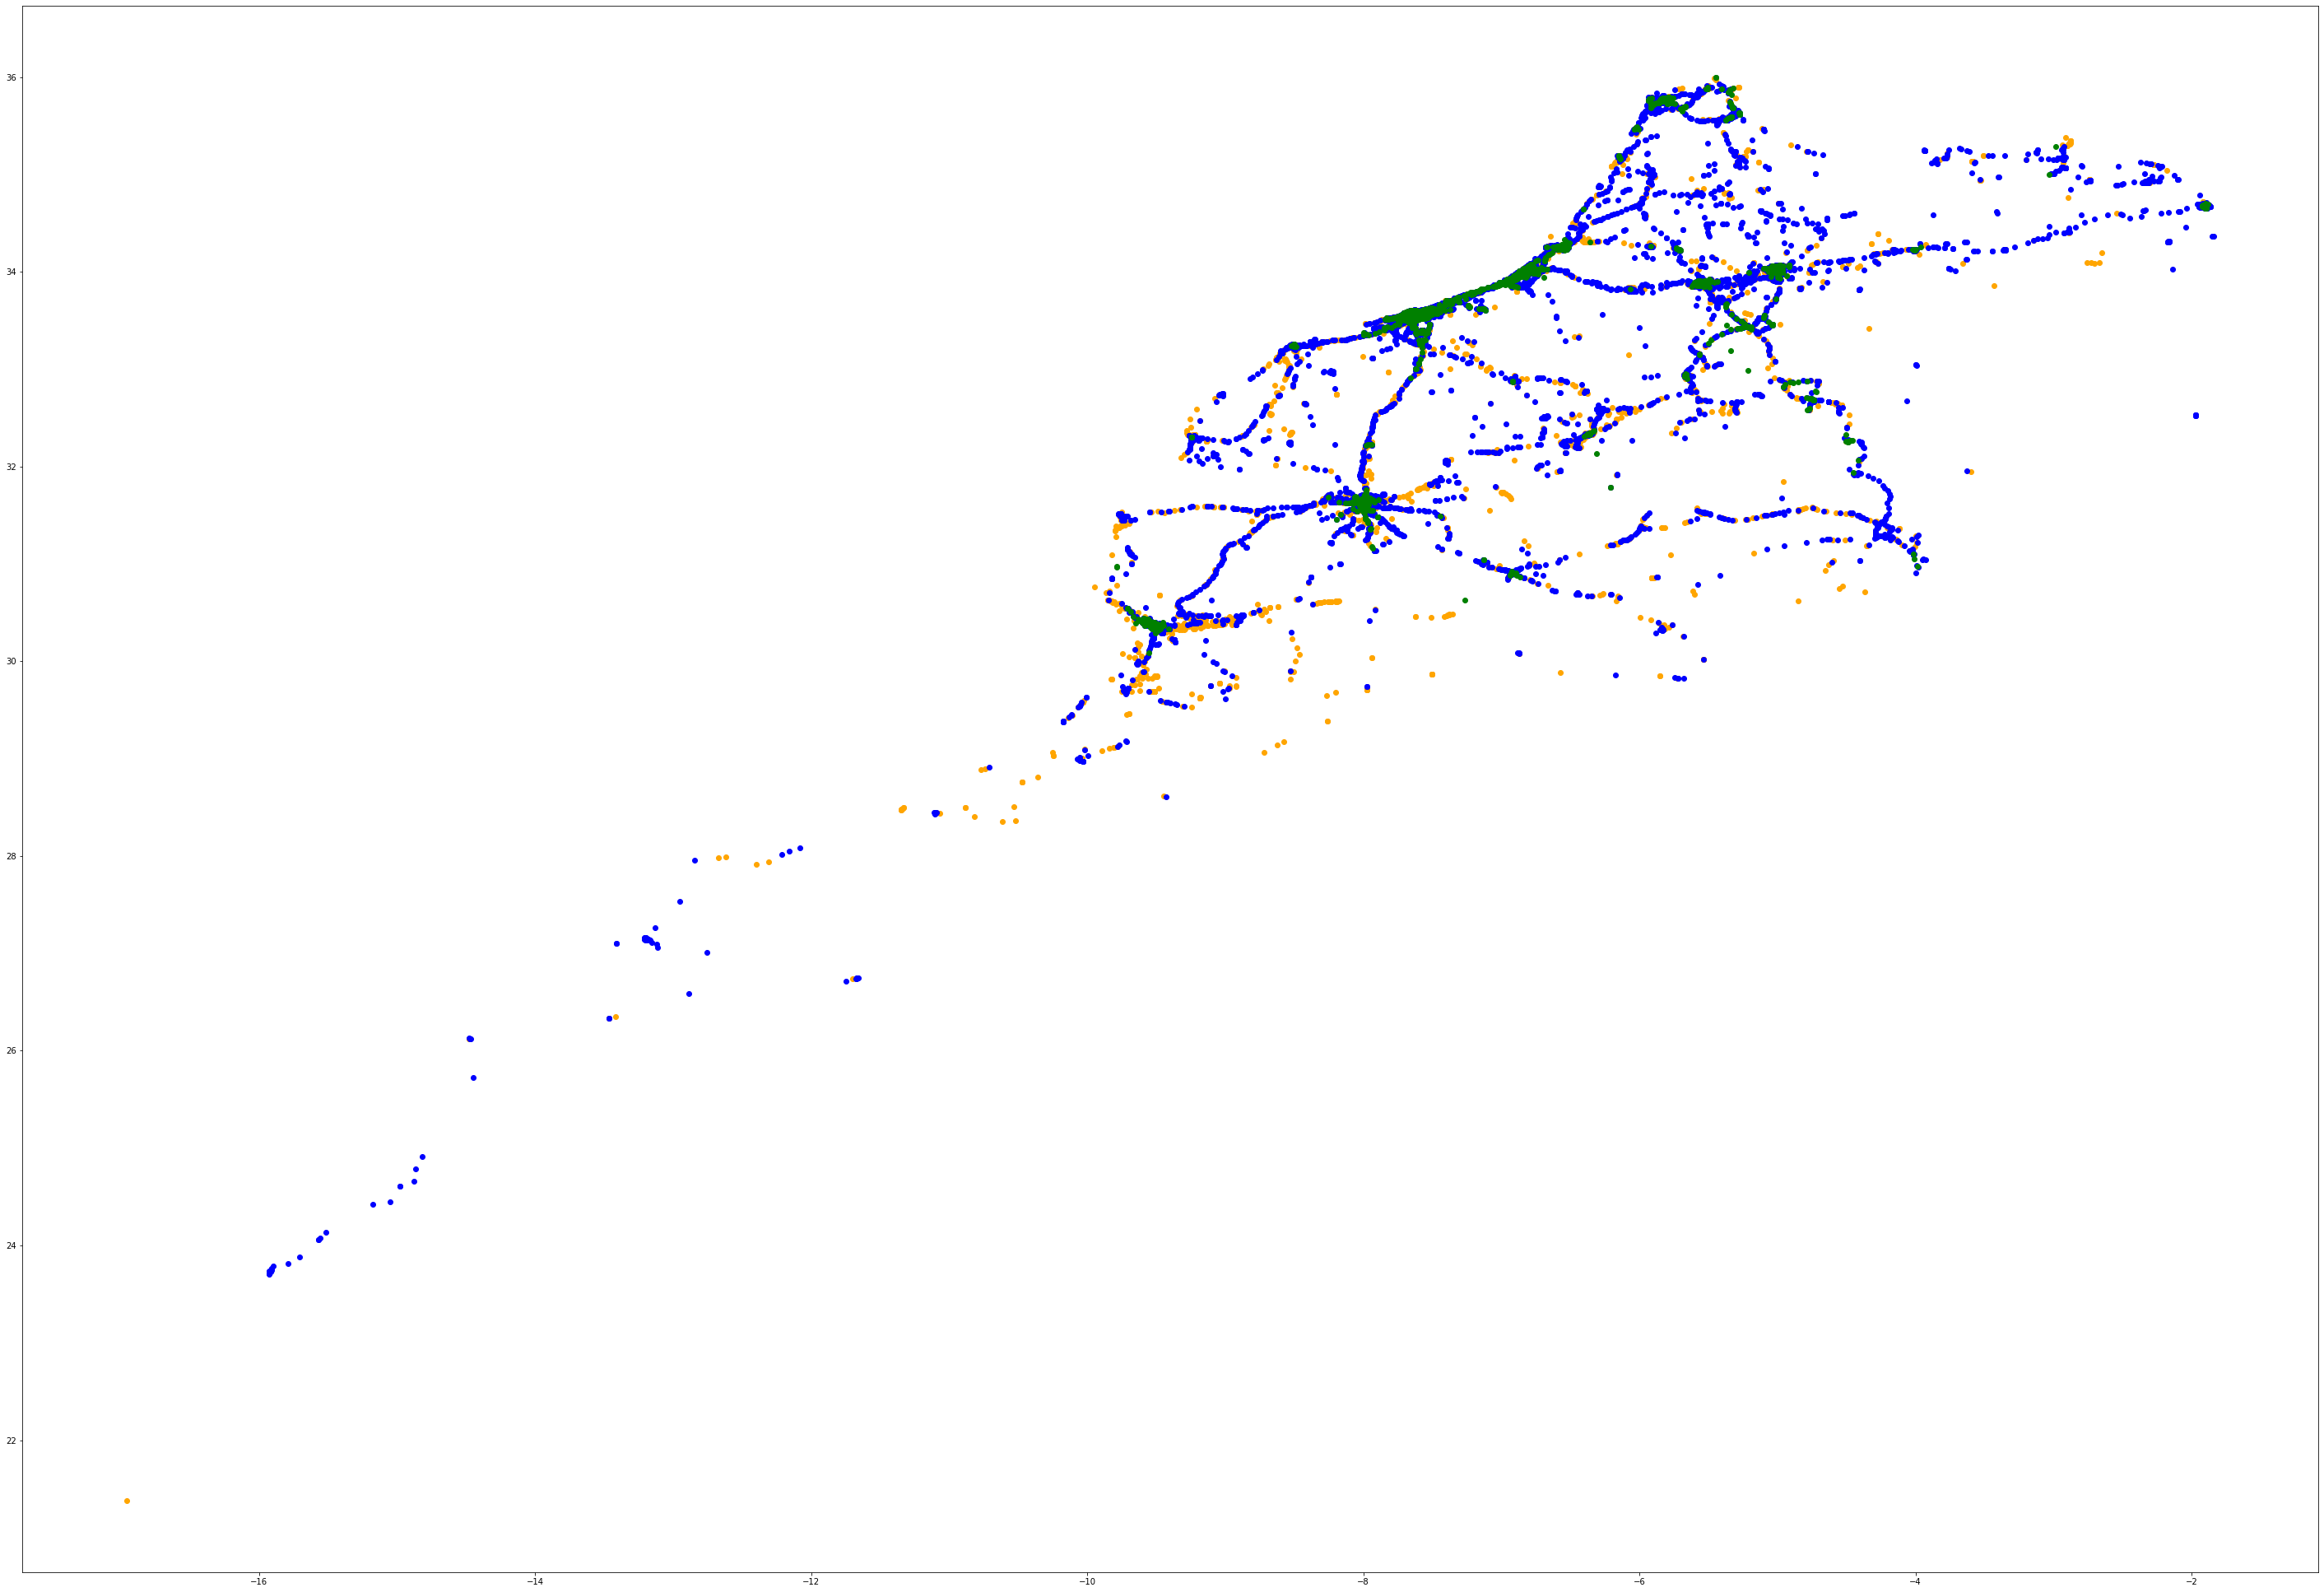

In [13]:
df_cell_gsm = df_cell[df_cell['radio'] == 'GSM']
df_cell_umts = df_cell[df_cell['radio'] == 'UMTS']
df_cell_lte = df_cell[df_cell['radio'] == 'LTE']

plt.scatter(x=df_cell_gsm['lon'], y= df_cell_gsm['lat'], c= 'orange')
plt.scatter(x=df_cell_umts['lon'], y= df_cell_umts['lat'], c= 'blue')
plt.scatter(x=df_cell_lte['lon'], y= df_cell_lte['lat'], c= 'green')

plt.rcParams["figure.figsize"] = (50, 35) # Creating figure size
plt.show()

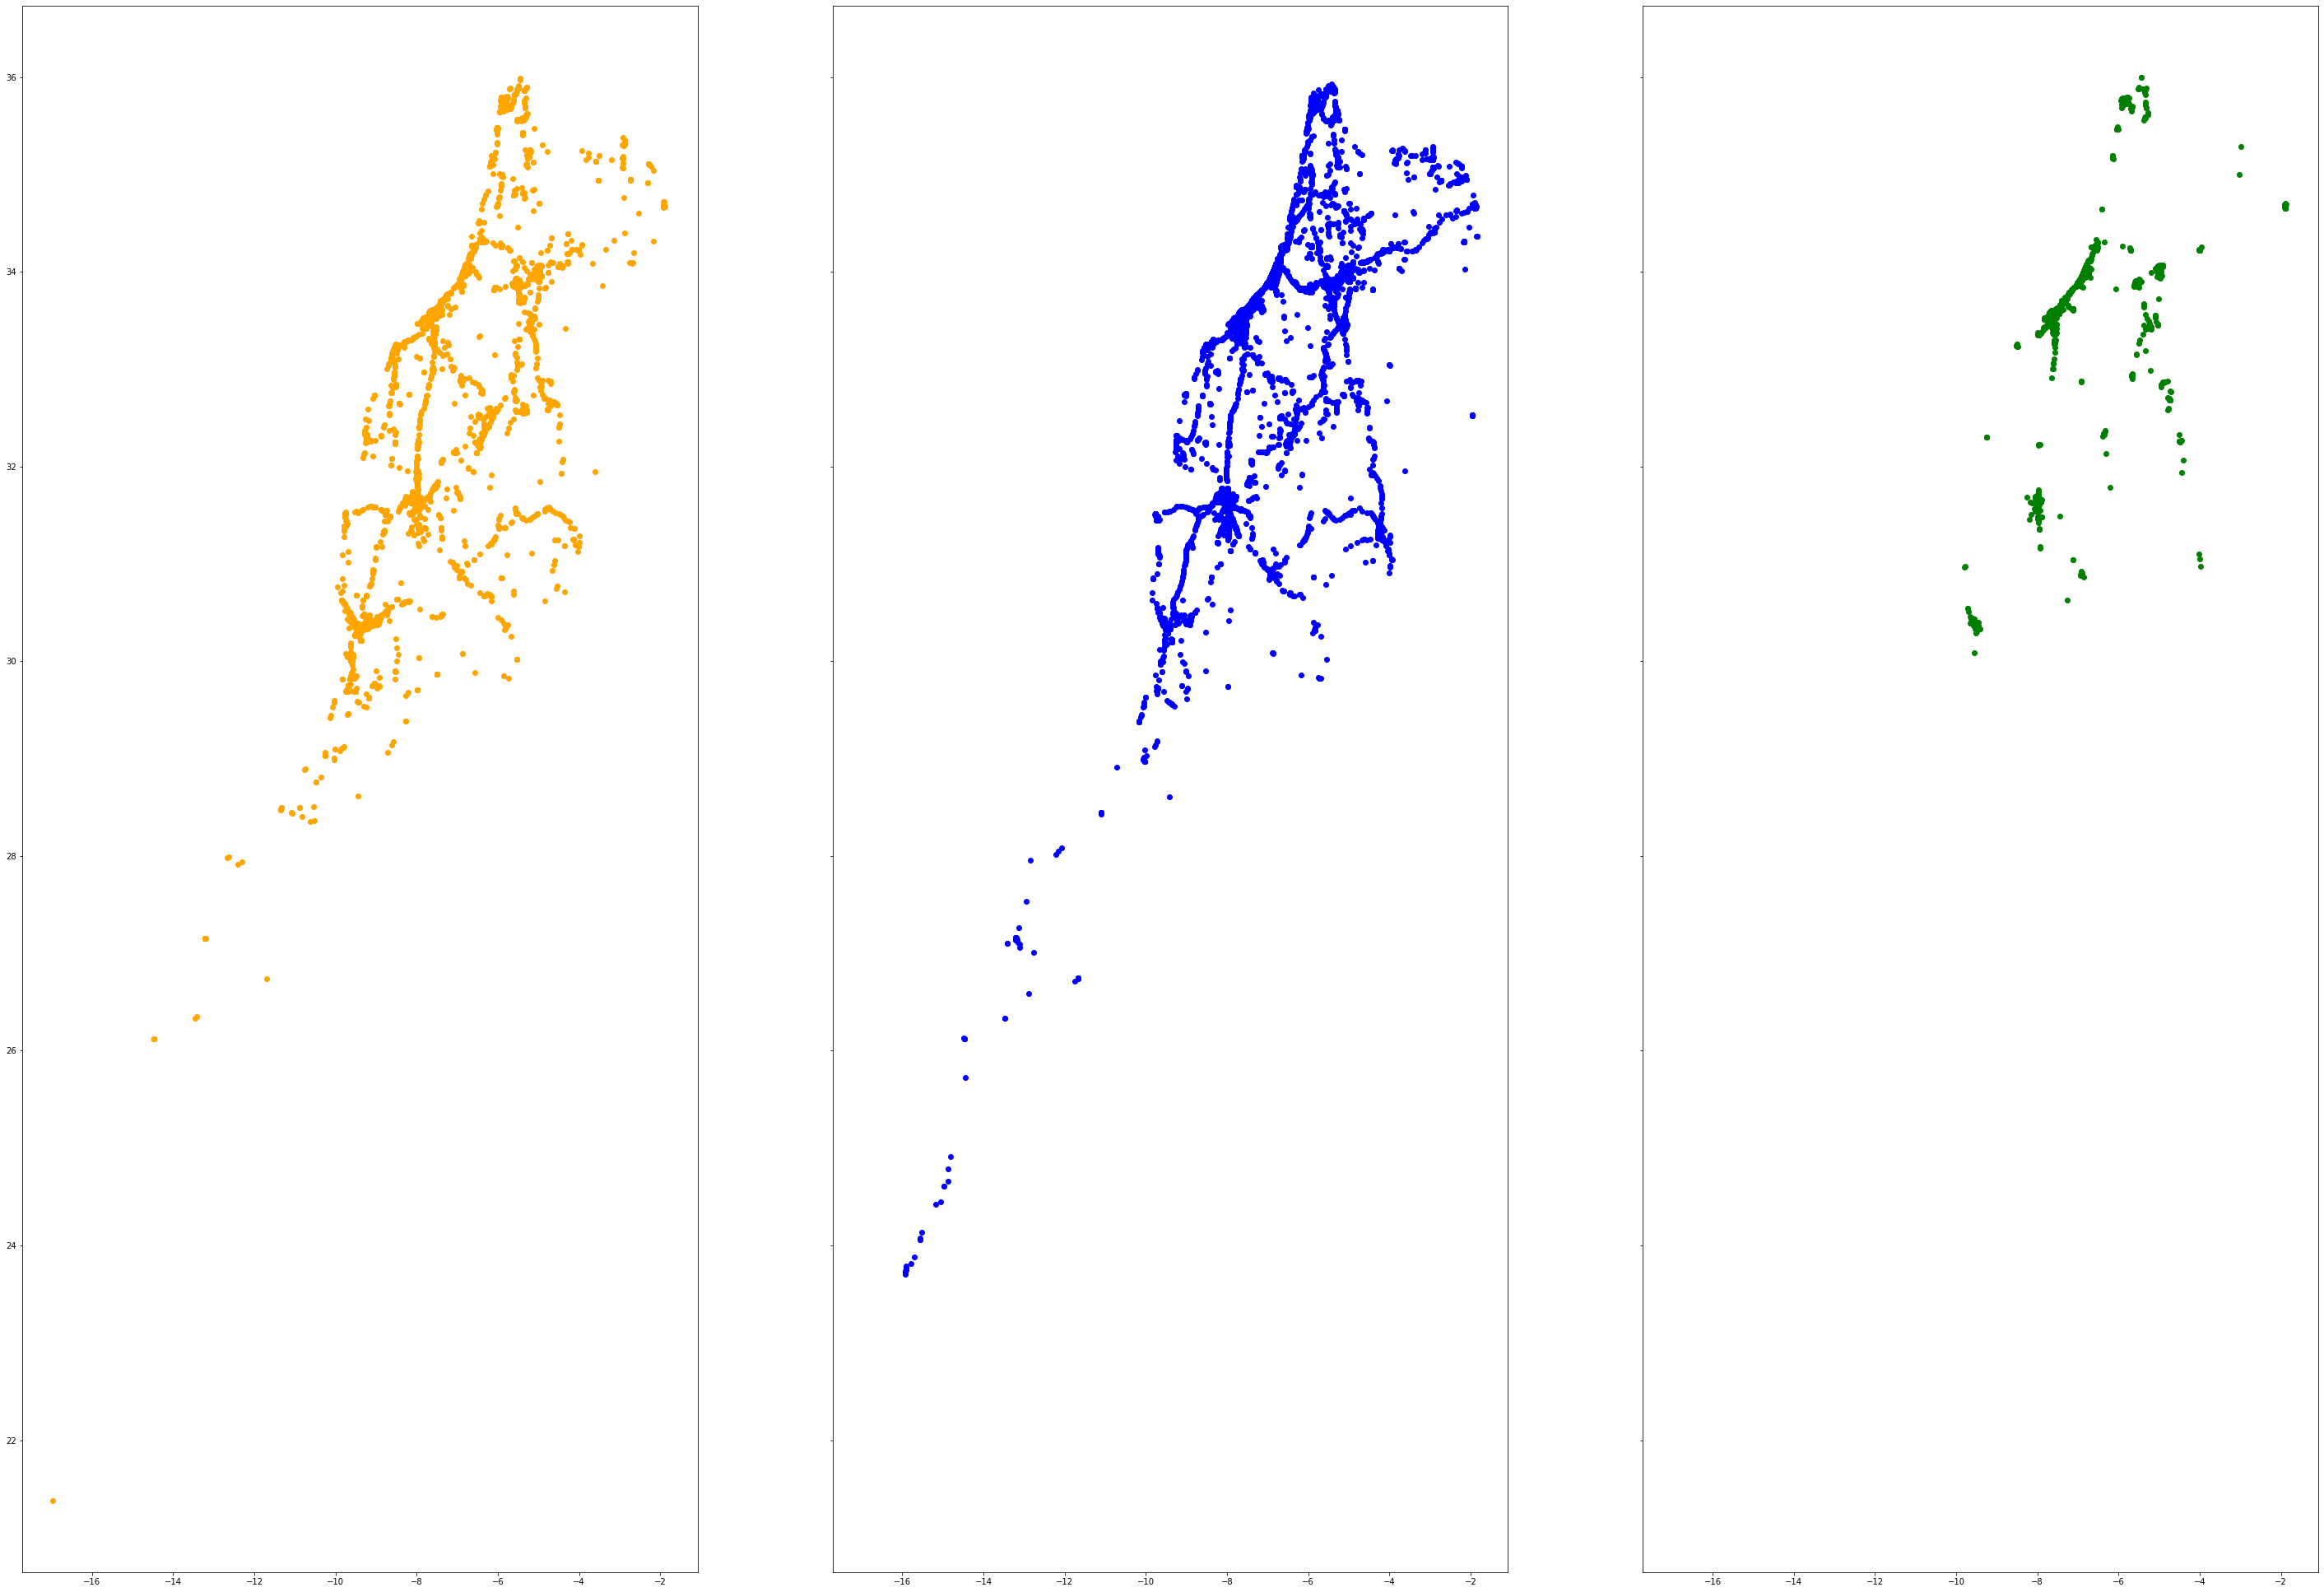

In [14]:
df_cell_gsm = df_cell[df_cell['radio'] == 'GSM']
df_cell_umts = df_cell[df_cell['radio'] == 'UMTS']
df_cell_lte = df_cell[df_cell['radio'] == 'LTE']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True)

ax1.scatter(x=df_cell_gsm['lon'], y= df_cell_gsm['lat'], c= 'orange')
ax2.scatter(x=df_cell_umts['lon'], y= df_cell_umts['lat'], c= 'blue')
ax3.scatter(x=df_cell_lte['lon'], y= df_cell_lte['lat'], c= 'green')

plt.show()

In [15]:
# Plot Geographical Data using a plotly density map
# https://infopython.com/how-to-plot-longitude-and-latitude-data-using-python/

### Ajout des ranges dans les cartes precedentes

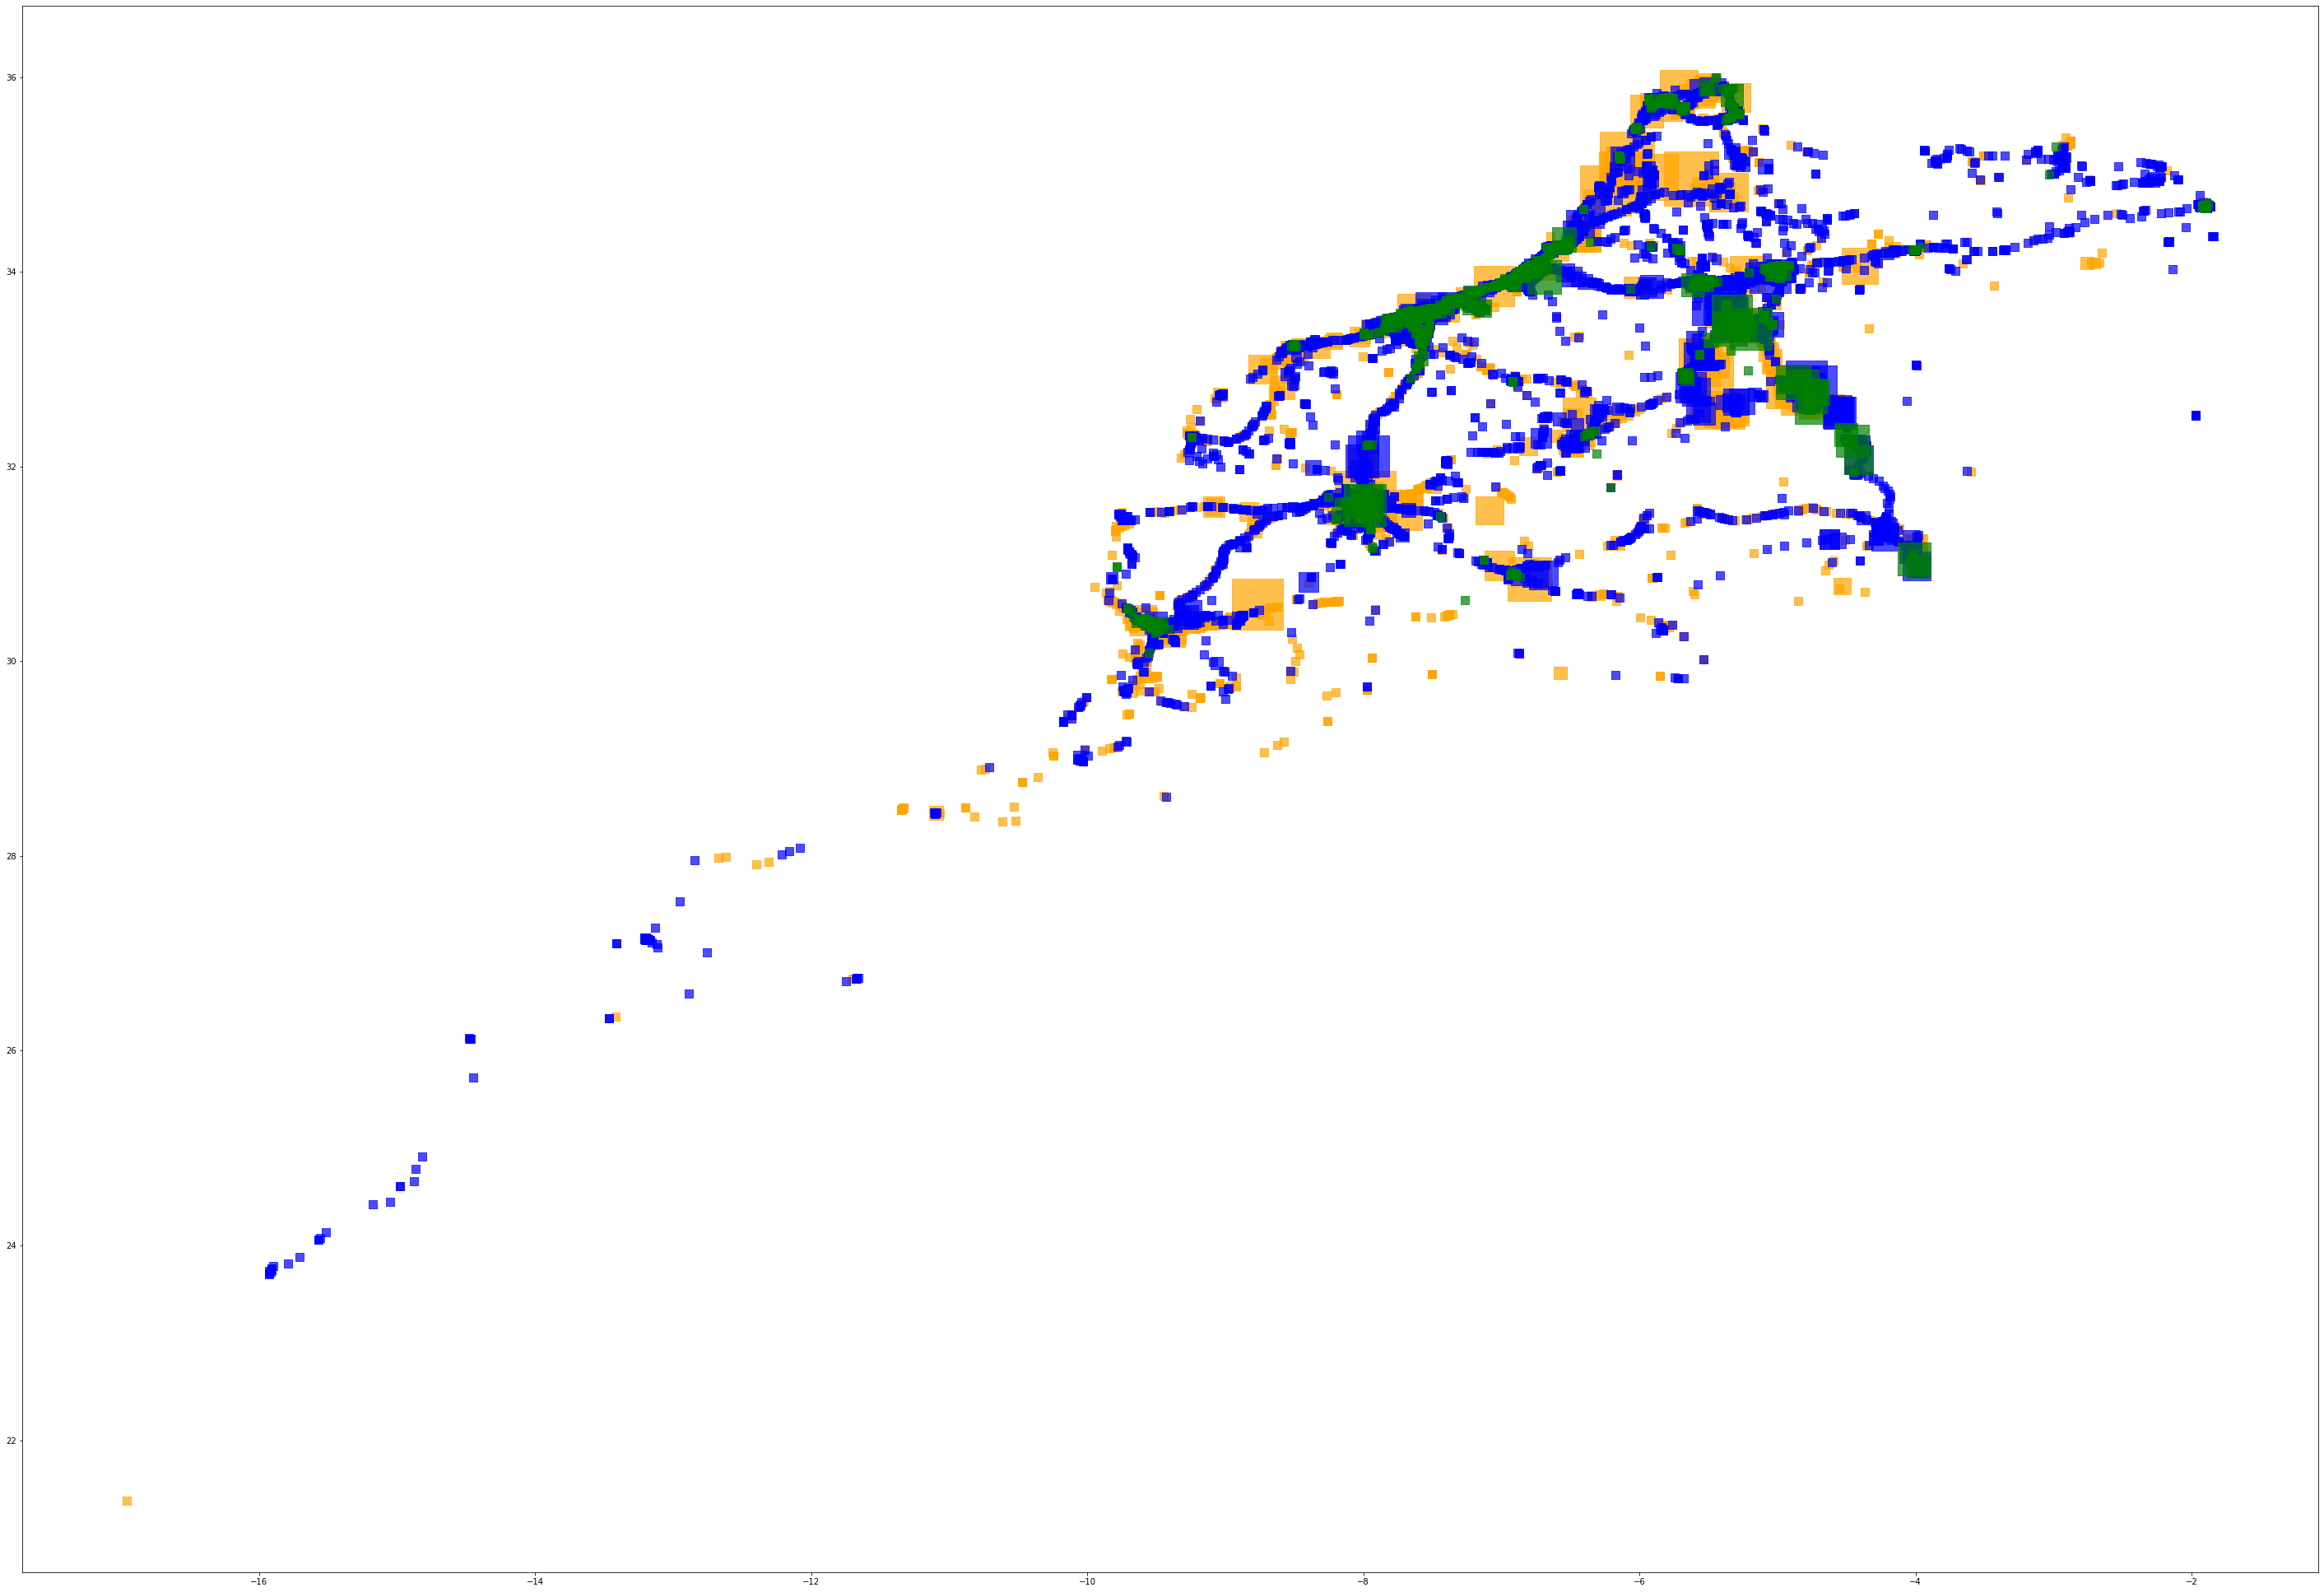

In [60]:
df_cell_gsm = df_cell[df_cell['radio'] == 'GSM']
df_cell_umts = df_cell[df_cell['radio'] == 'UMTS']
df_cell_lte = df_cell[df_cell['radio'] == 'LTE']

plt.scatter(x=df_cell_gsm['lon'], y= df_cell_gsm['lat'], s=df_cell_gsm['range']/10, c= 'orange', marker = 's', alpha=0.7)
plt.scatter(x=df_cell_umts['lon'], y= df_cell_umts['lat'], s=df_cell_umts['range']/10, c= 'blue', marker = 's', alpha=0.7)
plt.scatter(x=df_cell_lte['lon'], y= df_cell_lte['lat'], s=df_cell_lte['range']/10, c= 'green', marker = 's', alpha=0.7)

plt.rcParams["figure.figsize"] = (50, 35) # Creating figure size
plt.show()


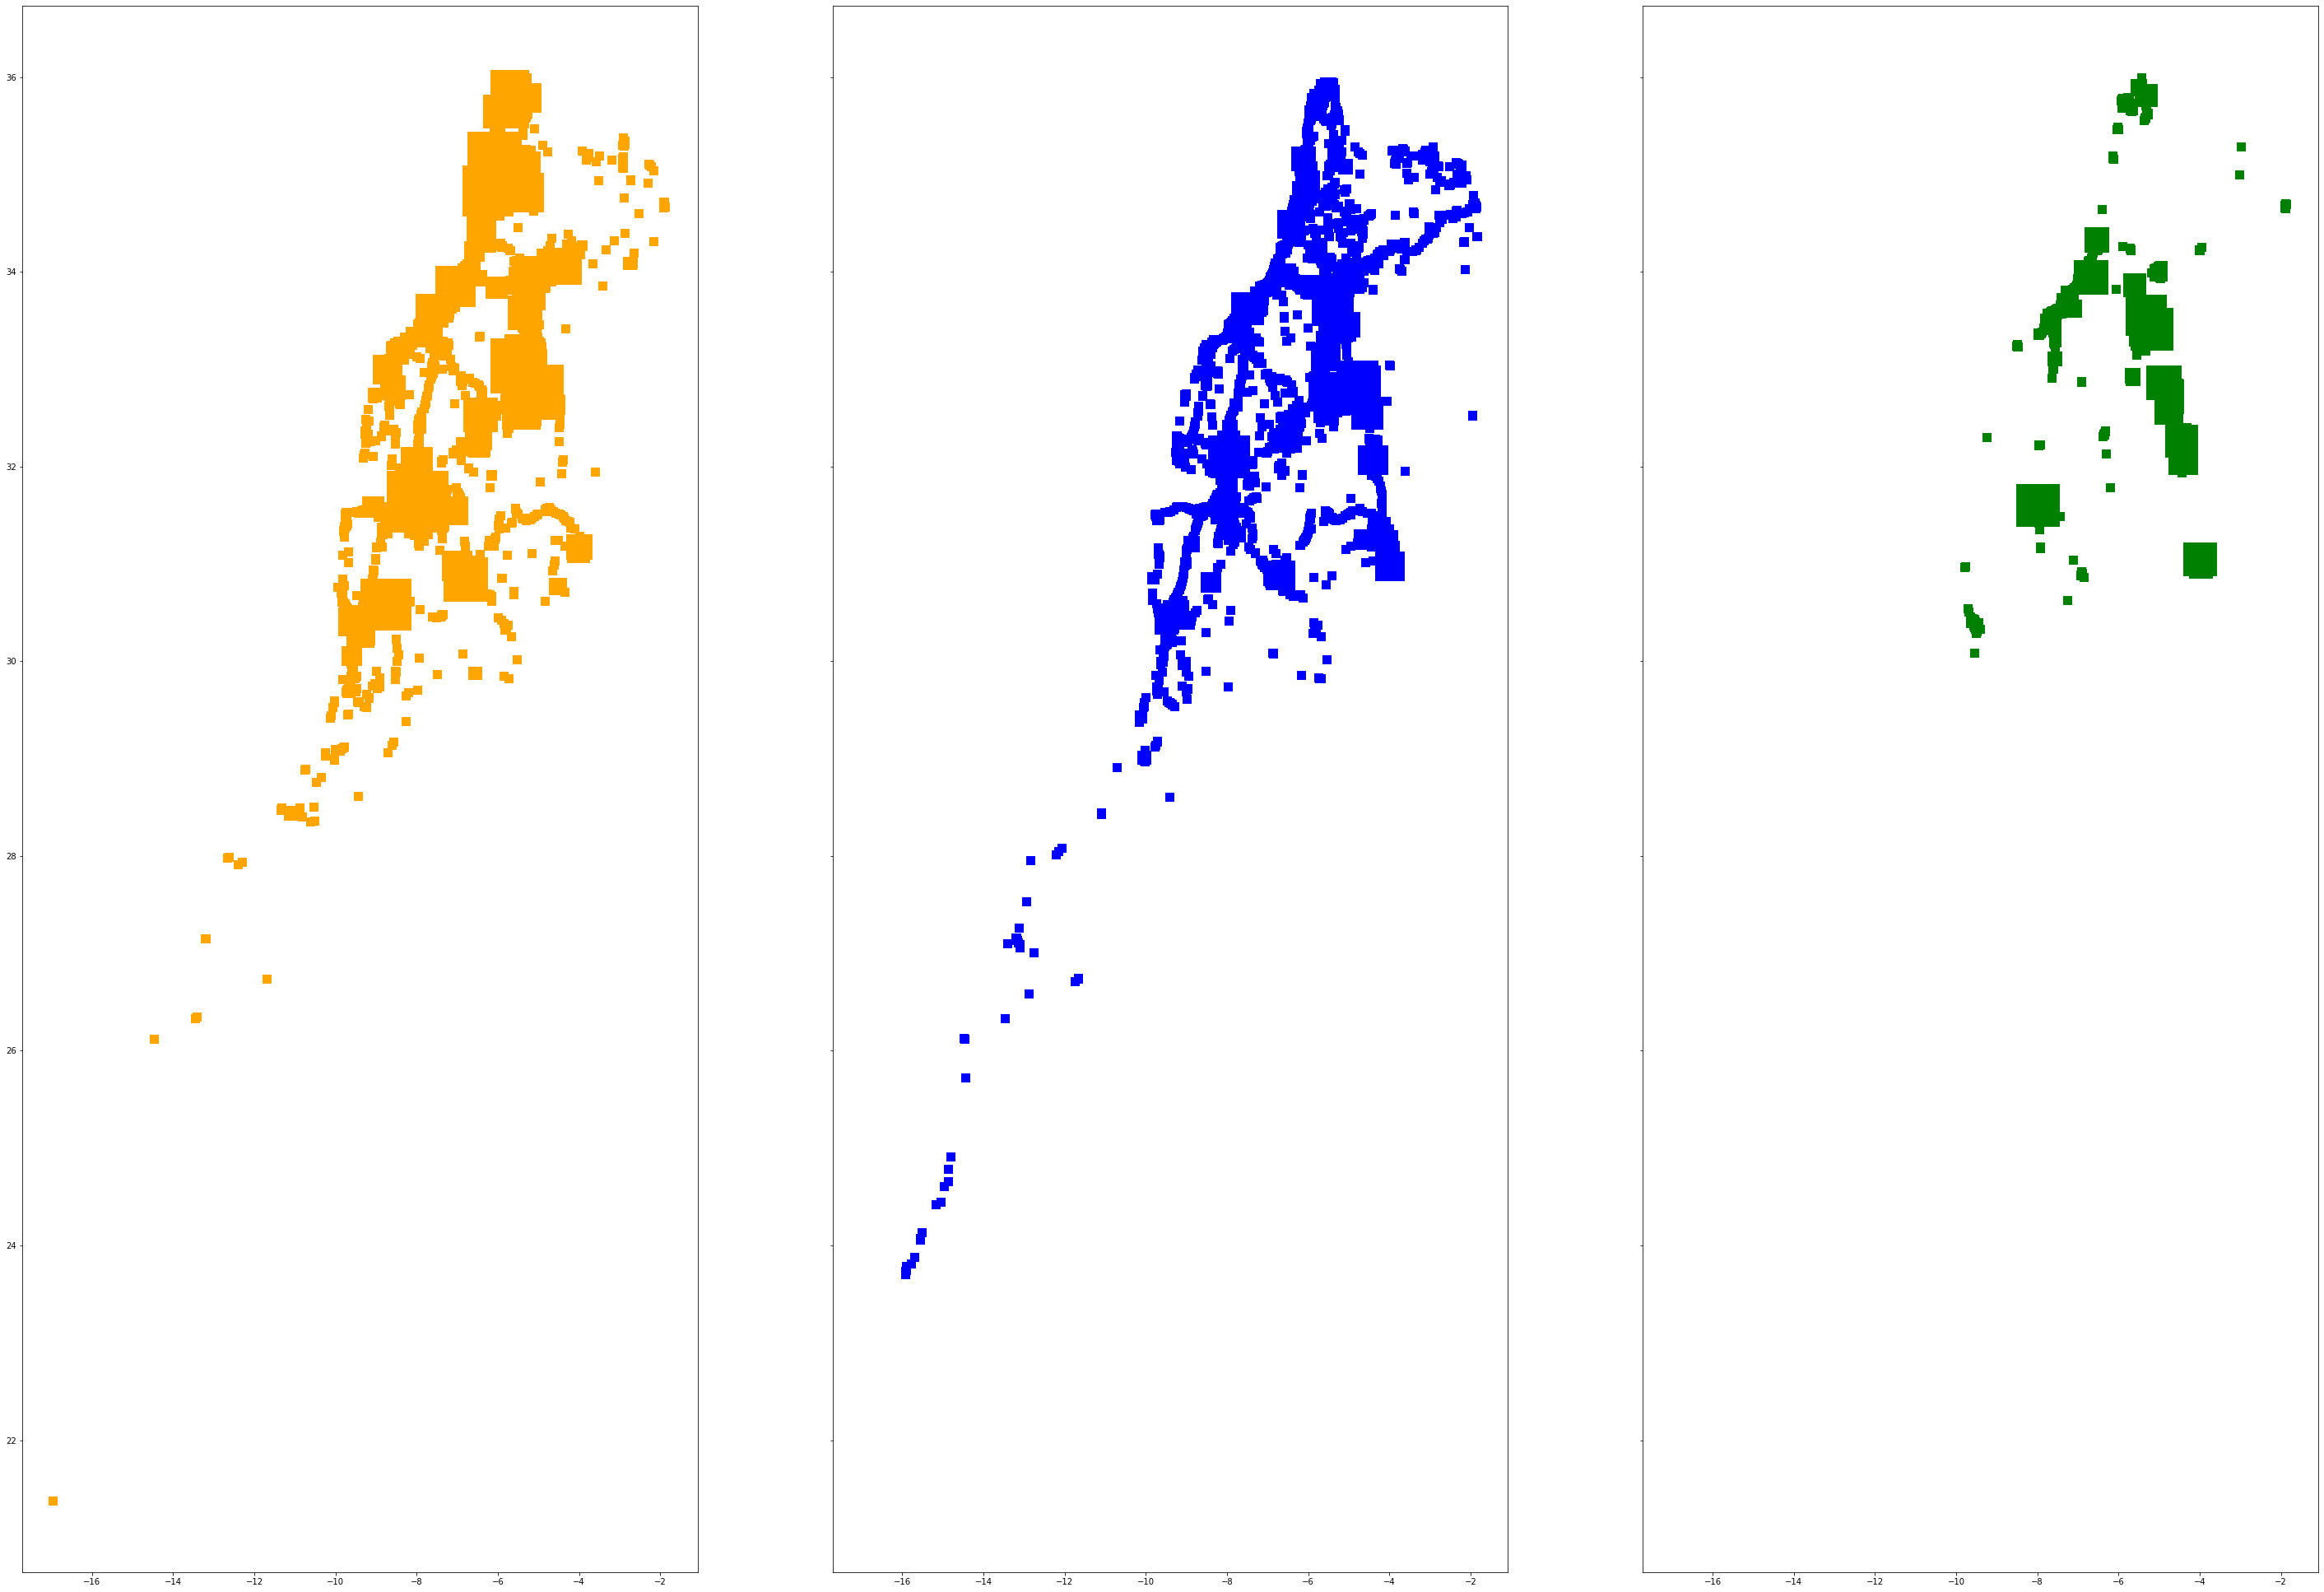

In [17]:
df_cell_gsm = df_cell[df_cell['radio'] == 'GSM']
df_cell_umts = df_cell[df_cell['radio'] == 'UMTS']
df_cell_lte = df_cell[df_cell['radio'] == 'LTE']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True)

ax1.scatter(x=df_cell_gsm['lon'], y= df_cell_gsm['lat'], s=df_cell_gsm['range']/10, c= 'orange', marker = 's')
ax2.scatter(x=df_cell_umts['lon'], y= df_cell_umts['lat'], s=df_cell_umts['range']/10, c= 'blue', marker = 's')
ax3.scatter(x=df_cell_lte['lon'], y= df_cell_lte['lat'], s=df_cell_lte['range']/10, c= 'green', marker = 's')

plt.show()

In [18]:
df_ville = pd.read_csv('dataset_ville.csv')
df_ville.head()

,ville,nbr,lat,lon
0,Casablanca,3127535,33.5731,-7.5898
1,Fes,1212325,34.0181,-5.0078
2,Marrakech,1126536,31.6295,-7.9811
3,Tanger,1034147,35.7595,-5.8340
4,Sale,1005731,34.0337,-6.7708


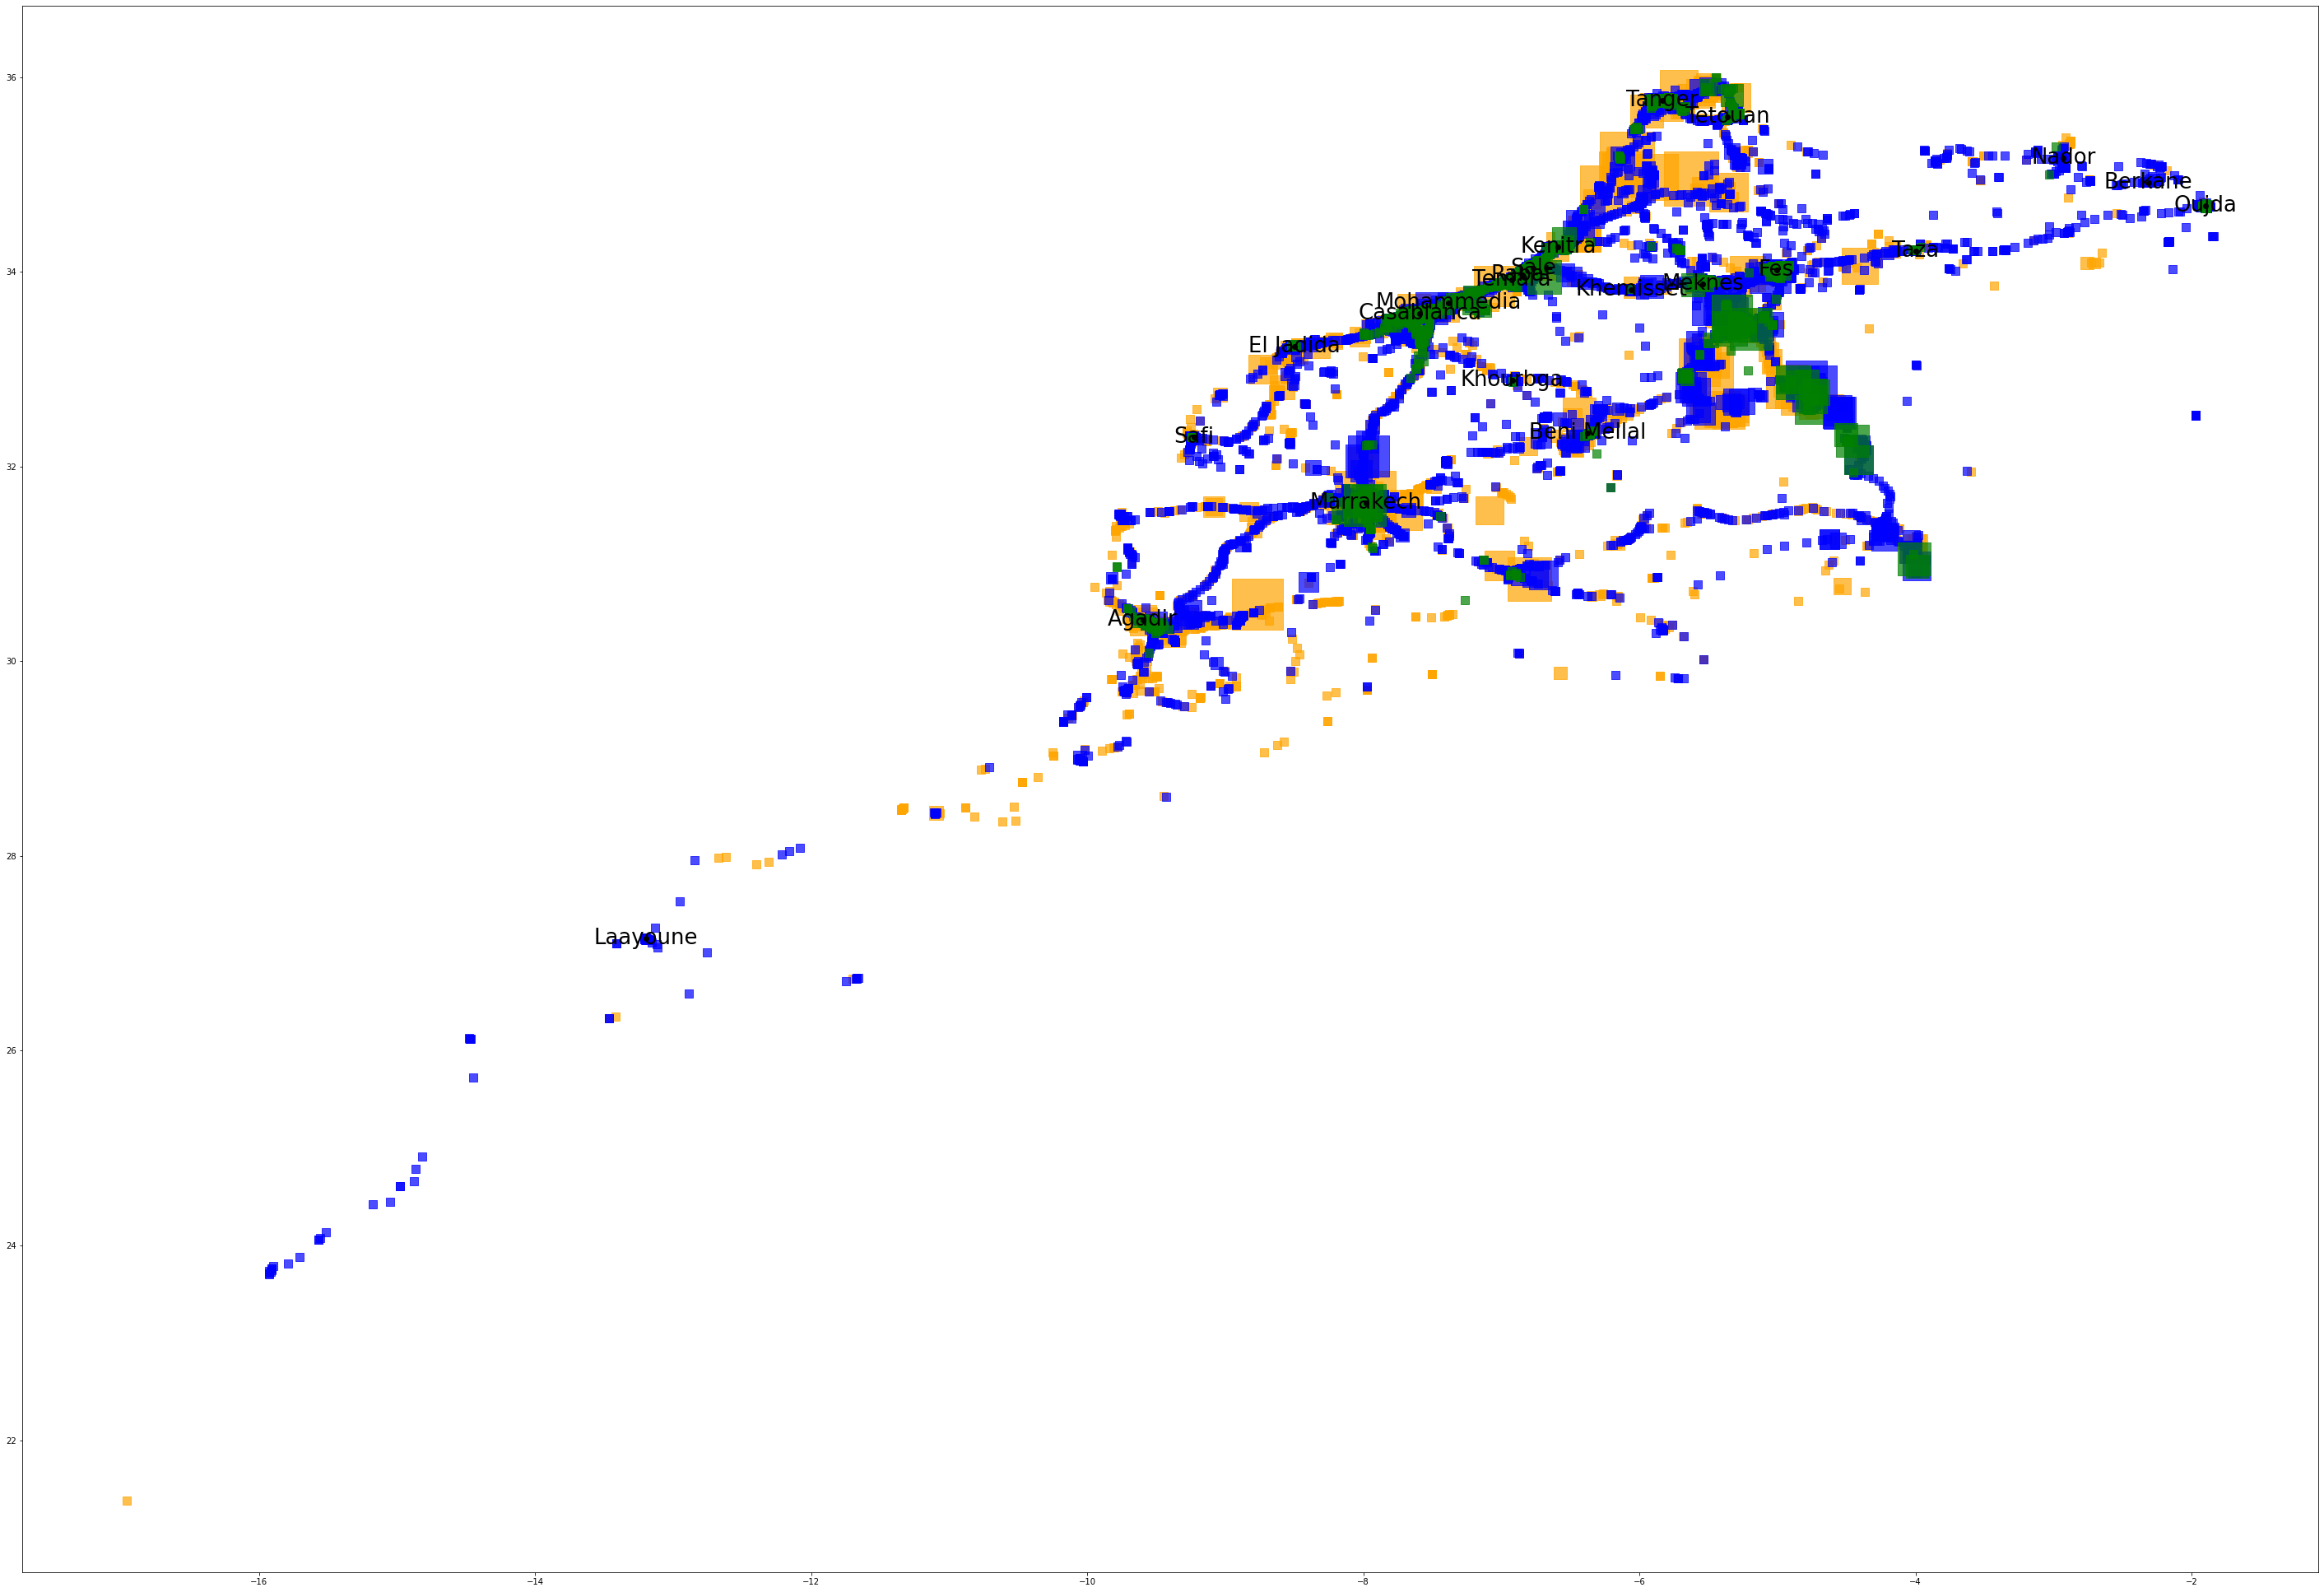

In [63]:
df_cell_gsm = df_cell[df_cell['radio'] == 'GSM']
df_cell_umts = df_cell[df_cell['radio'] == 'UMTS']
df_cell_lte = df_cell[df_cell['radio'] == 'LTE']

plt.scatter(x=df_cell_gsm['lon'], y= df_cell_gsm['lat'], s=df_cell_gsm['range']/10, c= 'orange', marker = 's', alpha=0.7)
plt.scatter(x=df_cell_umts['lon'], y= df_cell_umts['lat'], s=df_cell_umts['range']/10, c= 'blue', marker = 's', alpha=0.7)
plt.scatter(x=df_cell_lte['lon'], y= df_cell_lte['lat'], s=df_cell_lte['range']/10, c= 'green', marker = 's', alpha=0.7)

plt.scatter(x=df_ville['lon'], y= df_ville['lat'], c= 'black')

for ind in df_ville.index:
    plt.text(x=df_ville['lon'][ind], y= df_ville['lat'][ind], s=df_ville['ville'][ind], fontsize= 26, horizontalalignment='center',
     verticalalignment='center')
# TODO: Add legend
plt.show()

## New cell towers per year
The next figure highlights the cumulative number of how many cell towers per month have been created (inserted for the first time in the database) and updated (excluding those cell towers with no update)
cell towers are positioned along main transport routes across the MA as well as in major urban centres.

In [20]:
df.head()

,radio,mcc,net,area,cell,unit,lon,lat,range,samples,changeable,created,updated,averageSignal
4,GSM,604,0,5010,12101,0,-4.480362,34.576035,1000,1,1,1459668441,1459668441,0
3963,GSM,604,0,12080,4202,0,-7.638931,33.581772,1000,6,1,1382539124,1382539124,0
3967,GSM,604,0,6000,51290,0,-2.148514,34.999008,1000,8,1,1382764214,1382764214,0
3973,UMTS,604,0,30000,65736011,0,-7.638826,33.581666,1000,13,1,1382540466,1382540466,0
3974,UMTS,604,0,30000,65736018,0,-7.638474,33.581543,1000,6,1,1382539546,1382539546,0


In [21]:
# Convertion des dates
# The localtime() function takes the number of seconds passed since epoch as an argument and returns struct_time in local time.
# The strftime() function takes struct_time (or tuple corresponding to it) as an argument and returns a string representing it based on the format code used.
import time

df['created'] = df['created'].apply(lambda x: time.strftime("%Y", time.localtime(x)))
df['updated'] = df['updated'].apply(lambda x: time.strftime("%Y", time.localtime(x)))


In [25]:
df.head(100)

,radio,mcc,net,area,cell,unit,lon,lat,range,samples,changeable,created,updated,averageSignal
4,GSM,604,0,5010,12101,0,-4.480362,34.576035,1000,1,1,2016,2016,0
3963,GSM,604,0,12080,4202,0,-7.638931,33.581772,1000,6,1,2013,2013,0
3967,GSM,604,0,6000,51290,0,-2.148514,34.999008,1000,8,1,2013,2013,0
3973,UMTS,604,0,30000,65736011,0,-7.638826,33.581666,1000,13,1,2013,2013,0
3974,UMTS,604,0,30000,65736018,0,-7.638474,33.581543,1000,6,1,2013,2013,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9381,GSM,604,0,12000,3001,0,-7.649231,33.592758,1036,4,1,2014,2015,0
9384,UMTS,604,0,30800,65801832,0,-7.598007,33.587540,1000,5,1,2014,2014,0
9385,UMTS,604,0,30800,65801680,0,-7.543374,33.584061,1897,12,1,2014,2014,0
9386,UMTS,604,0,30800,65801168,0,-7.529068,33.592758,1000,1,1,2014,2014,0


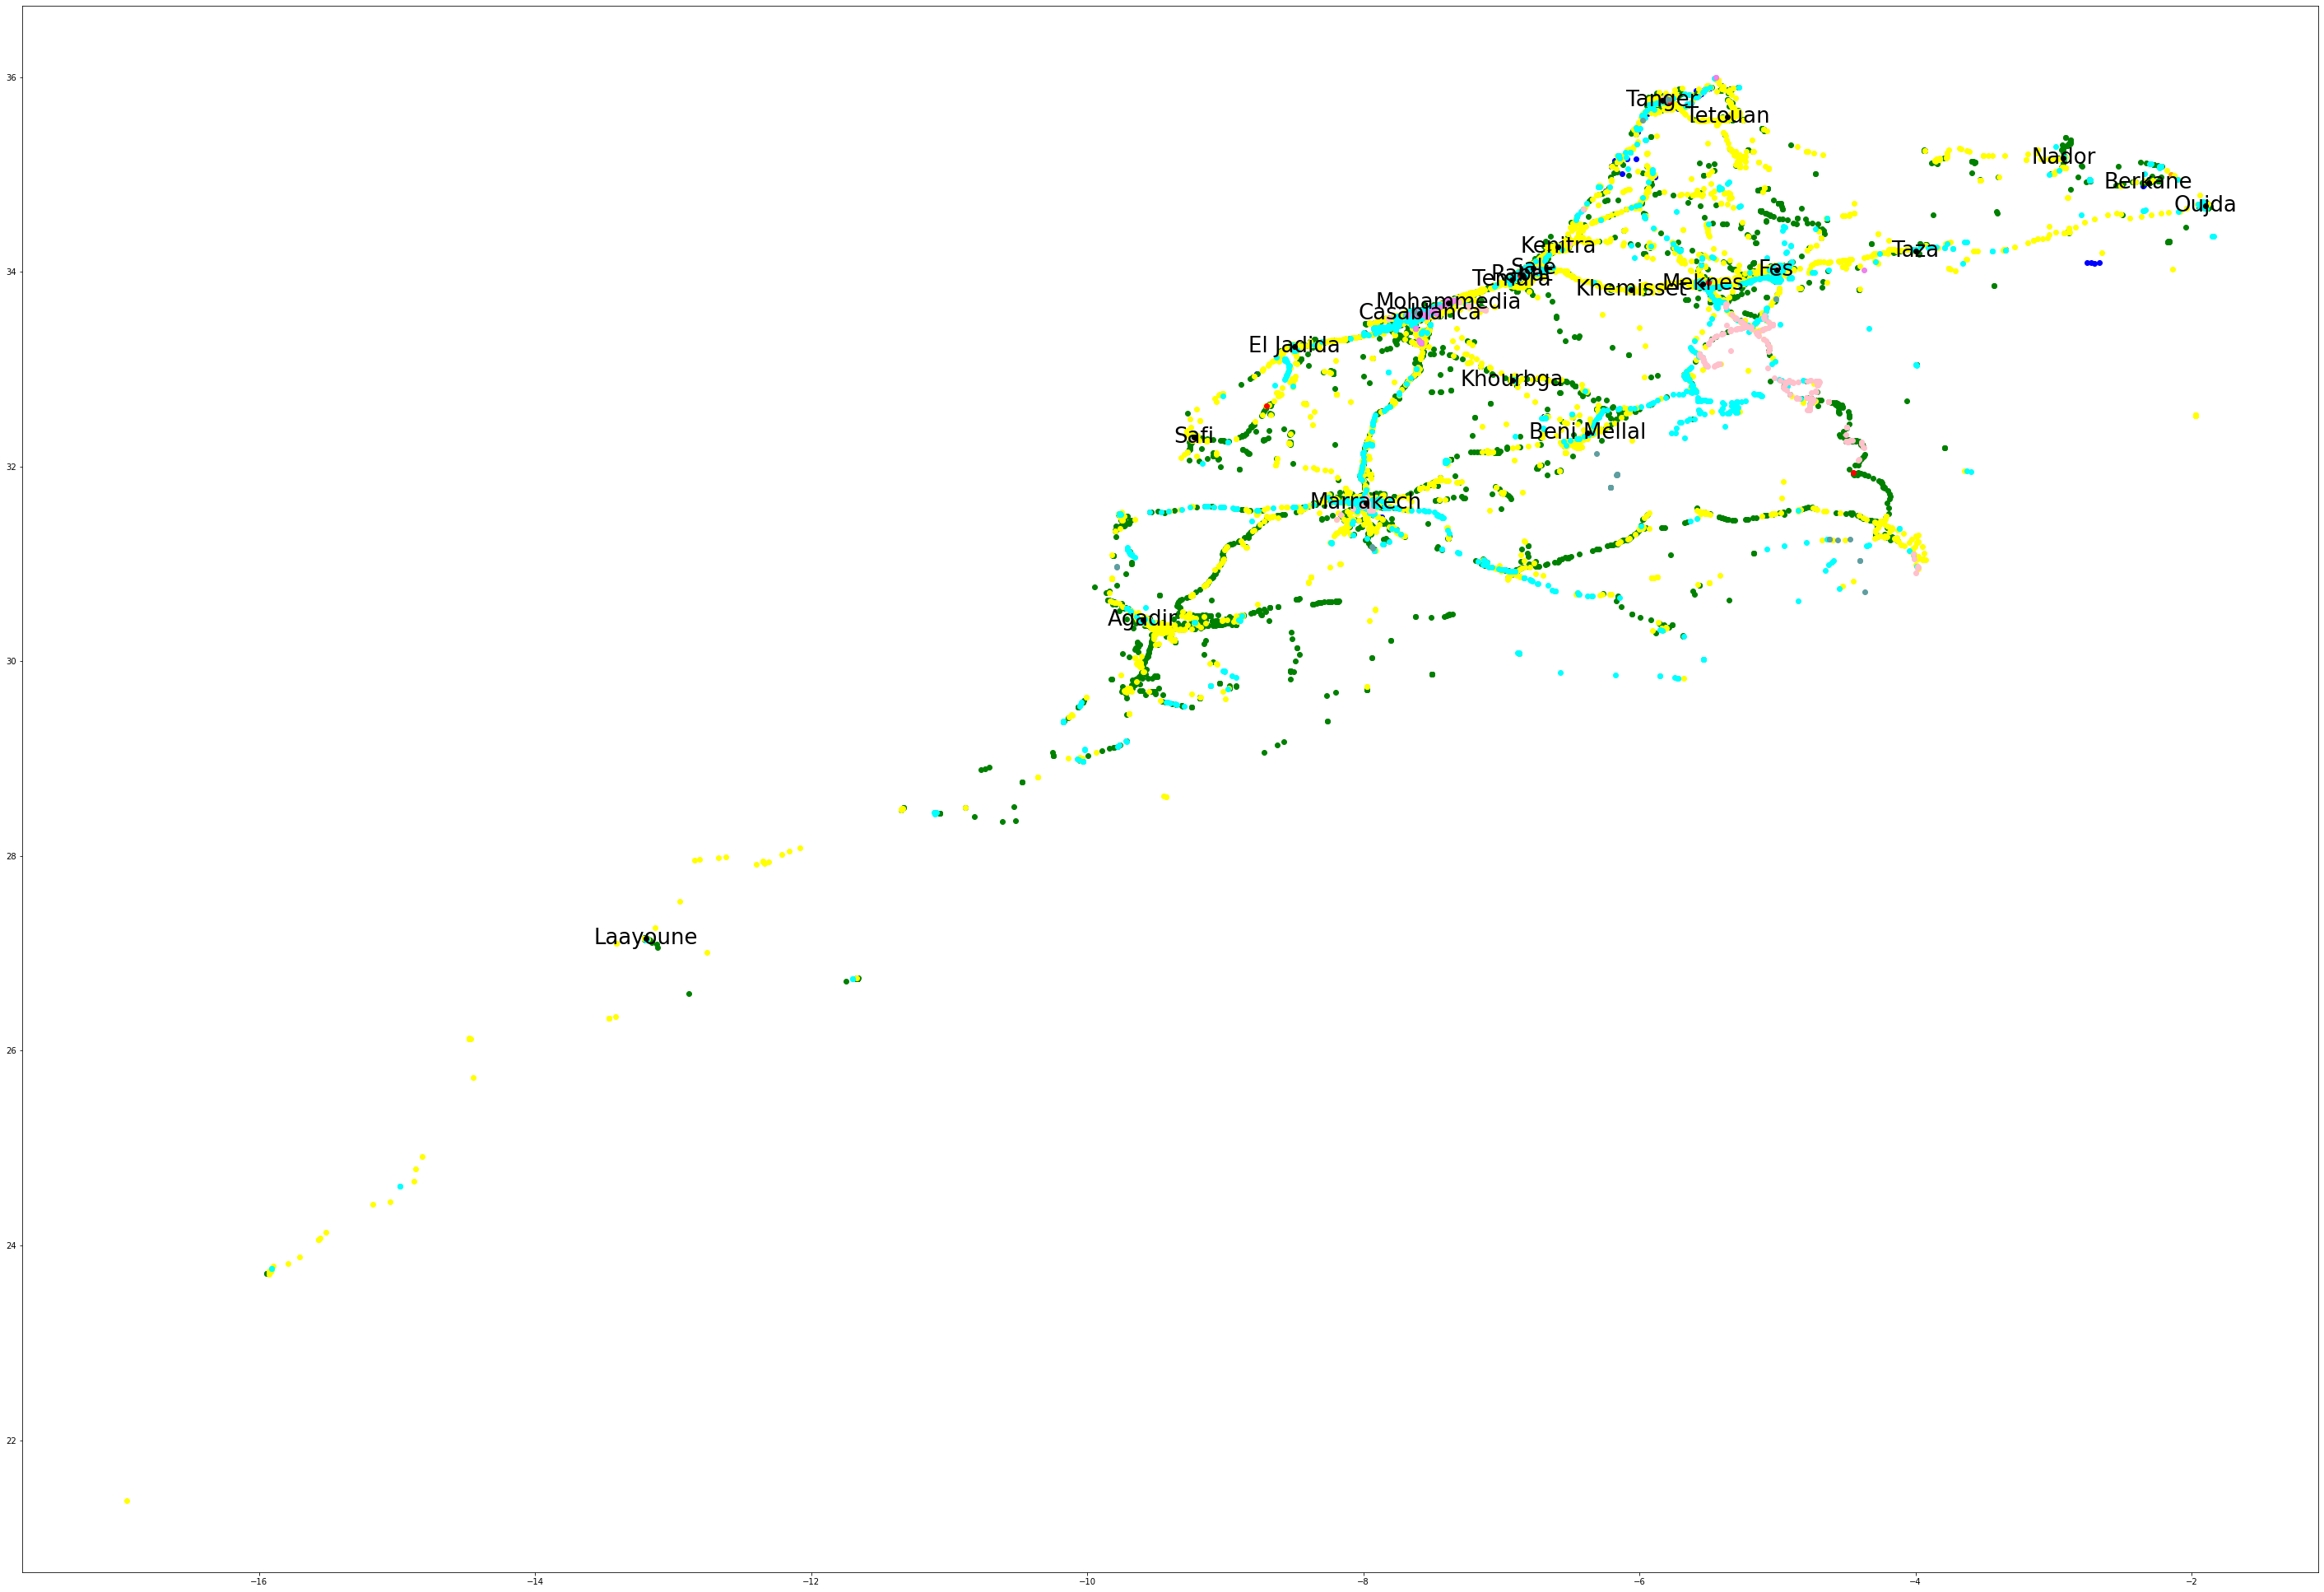

In [61]:
# Created cell over the last 9 years

df_cell_2013 = df[df['created'] == '2013']
df_cell_2014 = df[df['created'] == '2014']
df_cell_2015 = df[df['created'] == '2015']

df_cell_2016 = df[df['created'] == '2016']
df_cell_2017 = df[df['created'] == '2017']
df_cell_2018 = df[df['created'] == '2018']

df_cell_2019 = df[df['created'] == '2019']
df_cell_2020 = df[df['created'] == '2020']
df_cell_2021 = df[df['created'] == '2021']

plt.scatter(x=df_cell_2013['lon'], y= df_cell_2013['lat'], c= 'orange')
plt.scatter(x=df_cell_2014['lon'], y= df_cell_2014['lat'], c= 'blue')
plt.scatter(x=df_cell_2015['lon'], y= df_cell_2015['lat'], c= 'green')

plt.scatter(x=df_cell_2016['lon'], y= df_cell_2016['lat'], c= 'yellow')
plt.scatter(x=df_cell_2017['lon'], y= df_cell_2017['lat'], c= 'cyan')
plt.scatter(x=df_cell_2018['lon'], y= df_cell_2018['lat'], c= 'red')

plt.scatter(x=df_cell_2019['lon'], y= df_cell_2019['lat'], c= 'pink')
plt.scatter(x=df_cell_2020['lon'], y= df_cell_2020['lat'], c= 'violet')
plt.scatter(x=df_cell_2021['lon'], y= df_cell_2021['lat'], c= 'cadetblue')

plt.scatter(x=df_ville['lon'], y= df_ville['lat'], c= 'black')

for ind in df_ville.index:
    plt.text(x=df_ville['lon'][ind], y= df_ville['lat'][ind], s=df_ville['ville'][ind], fontsize= 26, horizontalalignment='center',
     verticalalignment='center')

# TODO: Add lagend
plt.show()

## Comparing the density of mobile phone cell towers with population estimates

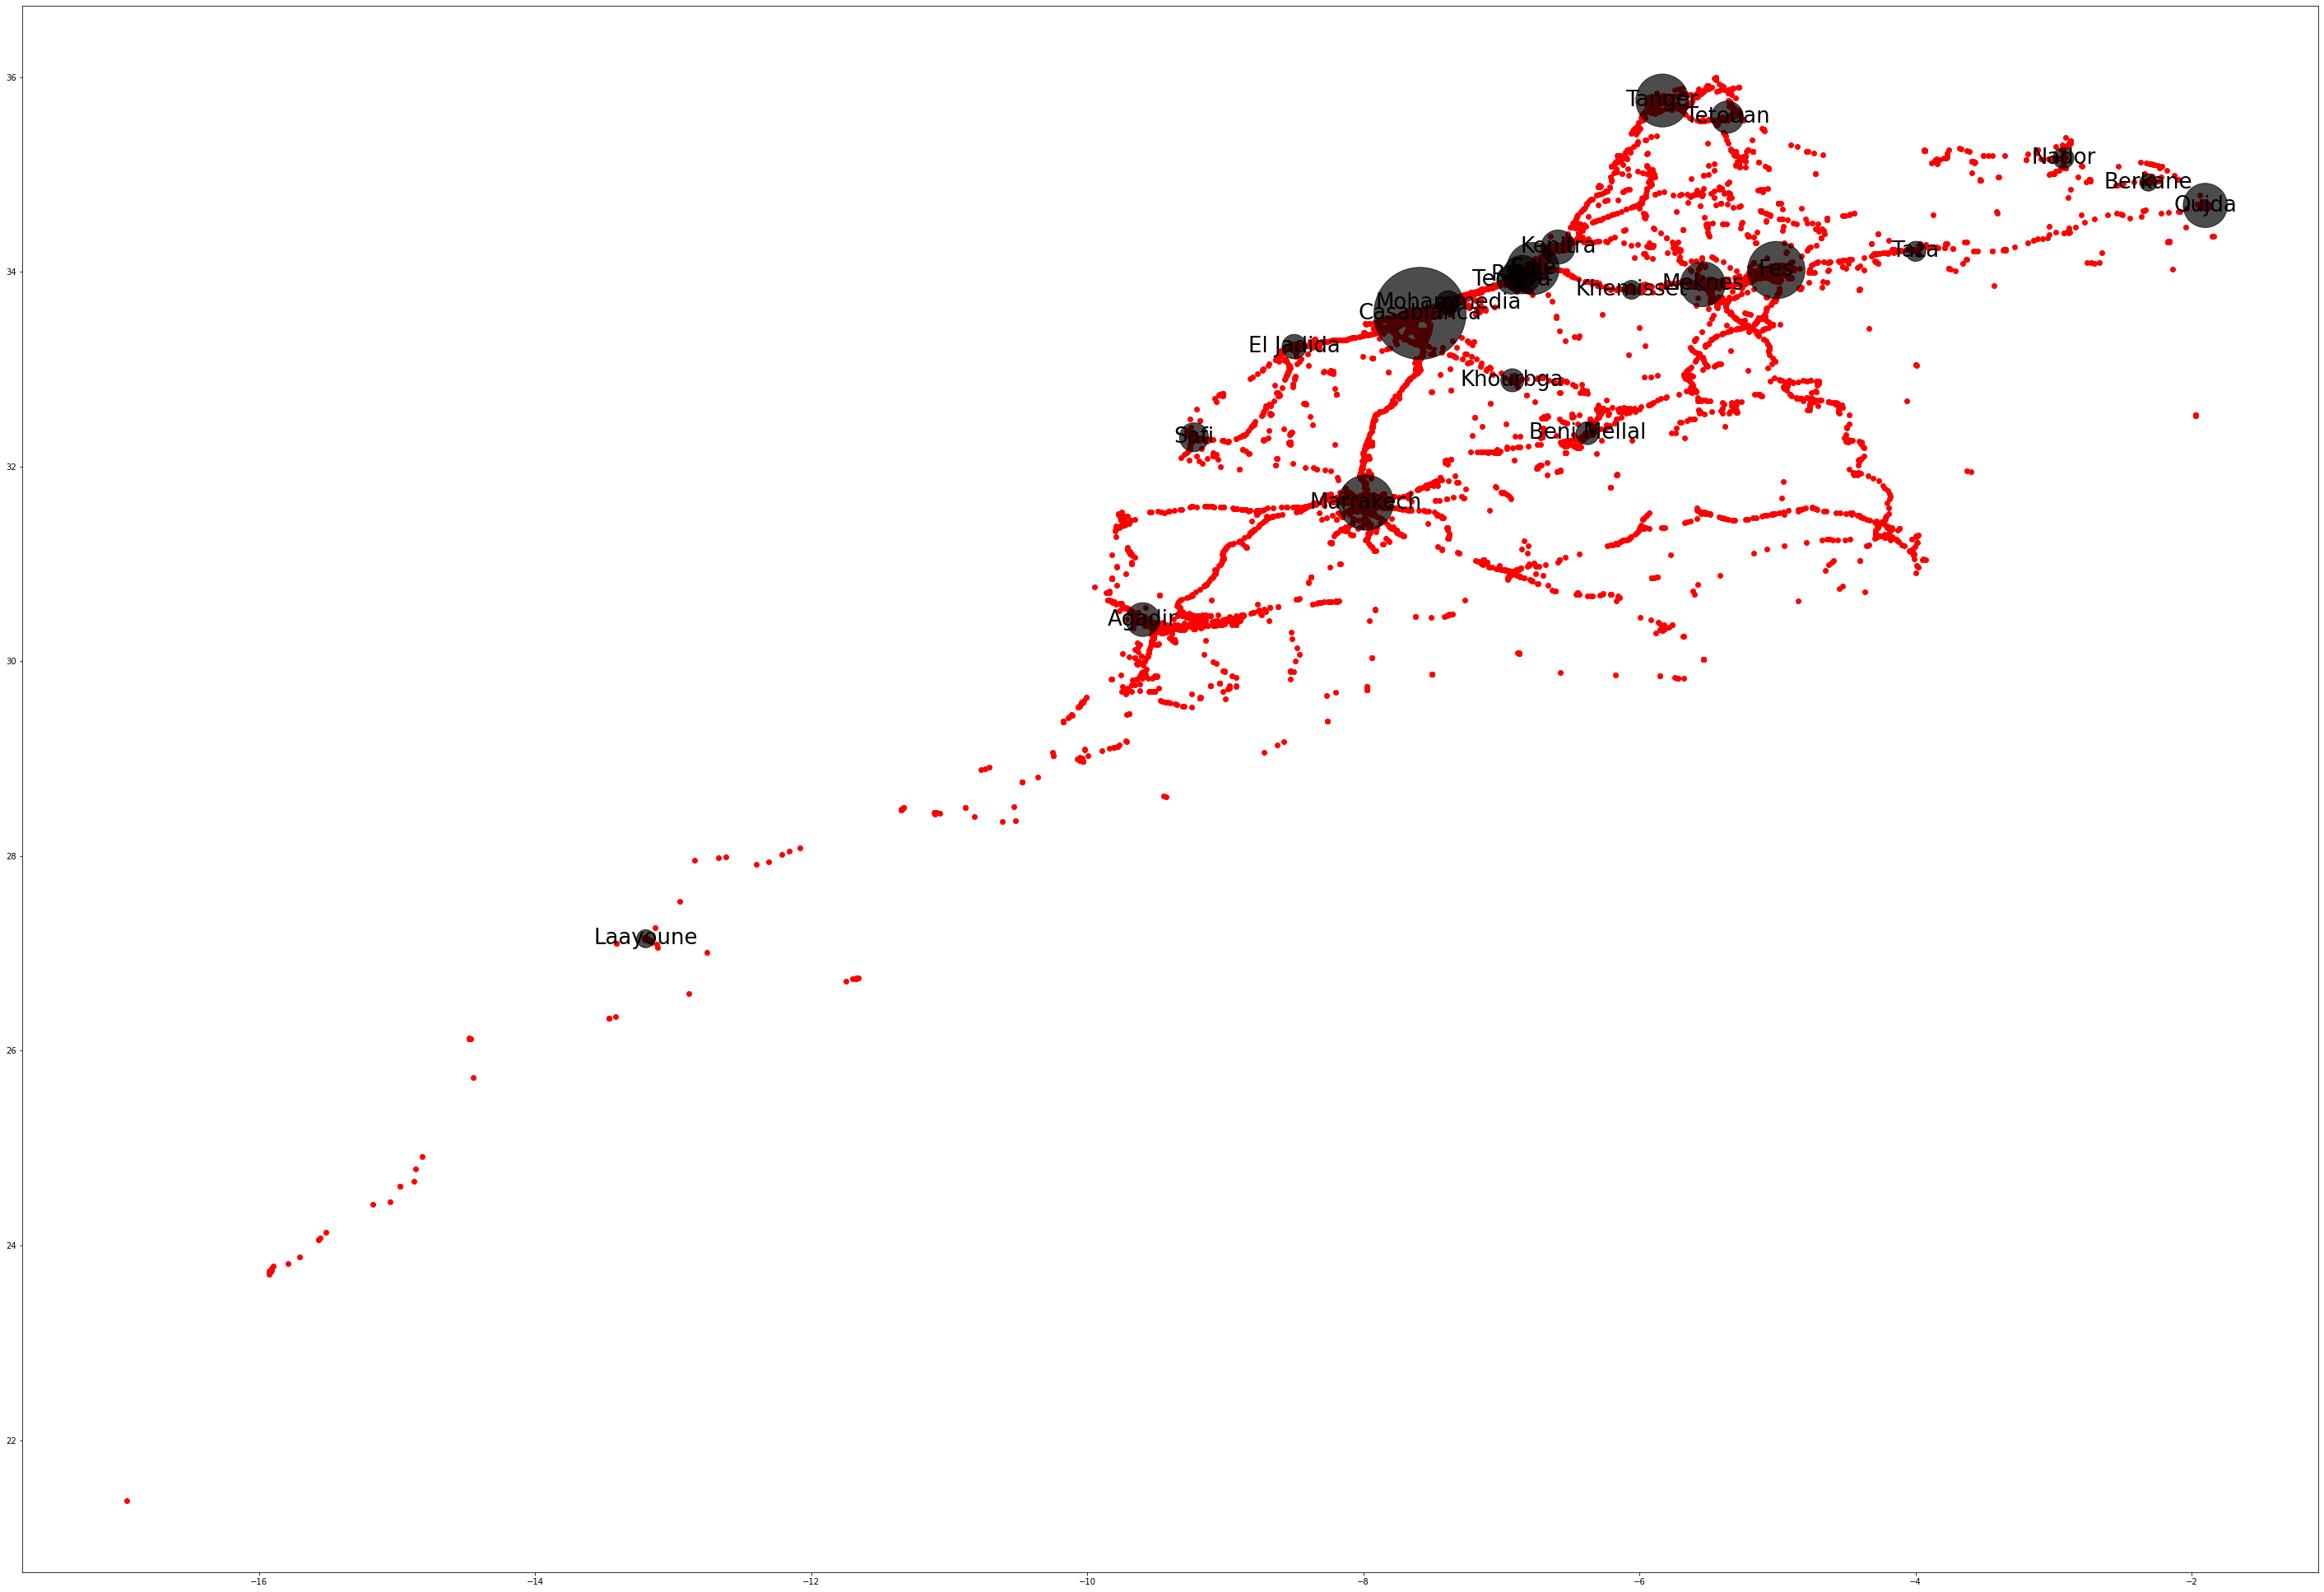

In [77]:
plt.scatter(x=df_cell['lon'], y= df_cell['lat'], c= 'red', marker = 'o')

plt.scatter(x=df_ville['lon'], y= df_ville['lat'], c= 'black', alpha=0.7, s=df_ville['nbr']/250)

for ind in df_ville.index:
    plt.text(x=df_ville['lon'][ind], y= df_ville['lat'][ind], s=df_ville['ville'][ind], fontsize= 26, horizontalalignment='center',
     verticalalignment='center')
# TODO: Add legend
plt.show()